In [499]:
import csv
import matplotlib.pyplot as plt  
import math

In [55]:
%matplotlib inline

In [689]:
data = []
with open("./test.txt") as f:
    reader = csv.reader(f)
    for row in reader:
        data.append({'type':row[0],'size':int(row[1]),'time':float(row[2])})

In [690]:
ij_time = {}
ji_time = {}
for d in data:
    if d['type'] == 'ij':
        ij_time[d['size']] =  d['time']
    elif d['type'] == 'ji':
        ji_time[d['size']] =  d['time']

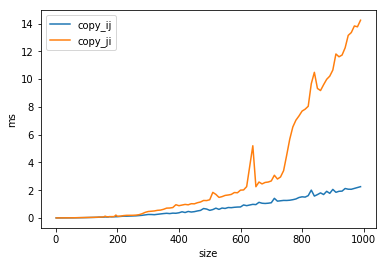

In [699]:
max_key = 1000
ij_time_plot = {}
ji_time_plot = {}
for key in ij_time:
    if key < max_key:
        ij_time_plot[key] = ij_time[key]
        
for key in ji_time:
    if key < max_key:
        ji_time_plot[key] = ji_time[key]

plt.plot([key for key in sorted(ij_time_plot)],[ij_time[key] * 1000 for key in sorted(ij_time_plot)], label='copy_ij')
plt.plot([key for key in sorted(ji_time_plot)],[ji_time[key] * 1000 for key in sorted(ji_time_plot)], label='copy_ji')

plt.xlabel('size')
plt.ylabel('ms')
plt.legend()

plt.savefig("examples1.png", dpi = 900)

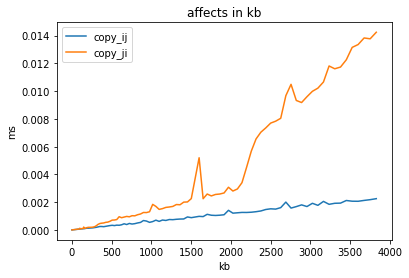

In [696]:
plt.plot([key * key * 4 / 1024.0 for key in sorted(ij_time_plot)] ,[ij_time_plot[key] for key in sorted(ij_time_plot)], label='copy_ij')
plt.plot([key * key * 4 / 1024.0 for key in sorted(ji_time_plot)],[ji_time_plot[key] for key in sorted(ji_time_plot)], label='copy_ji')

plt.title('affects in kb')
plt.xlabel('kb')
plt.ylabel('ms')
plt.legend()

plt.savefig("examples1.png", dpi = 900)

In [680]:
data = []
with open("./test2.txt") as f:
    reader = csv.reader(f)
    for row in reader:
        data.append({'len':int(row[0]),'step':int(row[1]),'time':float(row[2])})
        
info = []
with open("./info.txt") as f:
    reader = csv.reader(f)
    for row in reader:
        len_base,step_base, times,len_time,step_time = int(row[0]),int(row[1]),int(row[2]),int(row[3]),int(row[4])

In [681]:
size = list(range(1,len_time + 1))
step = list(range(1,step_time + 1))
size,step = np.meshgrid(size,step)

time = np.zeros((len(size),len(step)))
for row in data:
    si = int(math.log(row['len']/ len_base,times) )
    st = int(math.log(row['step']/ step_base,times))
    
    ll = row['len'] * 4 / 1024 / 1024
    tt = row['time'] 
    
    time[st][si] = ll / tt * 10

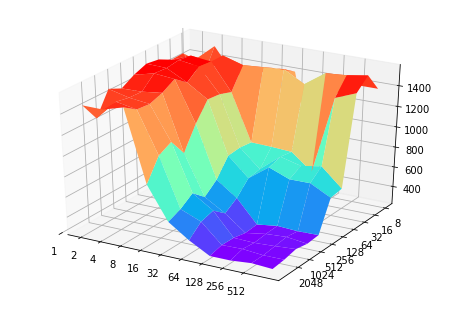

In [698]:
fig = plt.figure()
ax = Axes3D(fig)

ax.plot_surface(step, size, time, rstride=1, cstride=1, cmap='rainbow')

ax.invert_yaxis()

plt.xticks(range(step_time), [step_base * times ** i for i in range(step_time)] )
plt.yticks(range(len_time), [int(len_base * times ** i * 4 / 1000) for i in range(len_time)] )

plt.savefig("examples.png", dpi = 900)
